Preparing the data

In [26]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load SVHN dataset from .h5 file
with h5py.File('pics.h5', 'r') as f:
    # Get keys from h5py object
    keys = list(f.keys())
    
    # Get train, validation, and test data and labels
    x_train = np.array(f['X_train'])
    y_train = np.array(f['y_train'])
    x_val = np.array(f['X_val'])
    y_val = np.array(f['y_val'])
    x_test = np.array(f['X_test'])
    y_test = np.array(f['y_test'])

        # Reshape the data to include the channel dimension
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)

# Verify the shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (42000, 32, 32, 1)
y_train shape: (42000,)
x_val shape: (60000, 32, 32, 1)
y_val shape: (60000,)
x_test shape: (18000, 32, 32, 1)
y_test shape: (18000,)


Visualizing the dataset

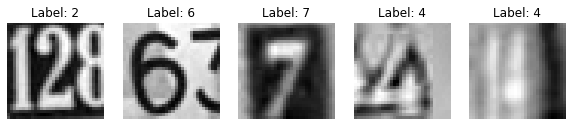

In [28]:
# Function to visualize images
def visualize_images(images, labels, count):
    fig, axes = plt.subplots(1, count, figsize=(10, 2))
    for i in range(count):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

# Visualize first 5 images from training set
visualize_images(x_train, y_train, 5)


preprocessing - normalizing the images

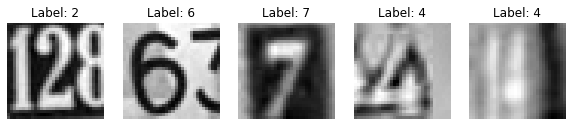

In [29]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
visualize_images(x_train, y_train, 5)


DNN Classifier training and test

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the model
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:])) # Flatten layer to transform the 2D image data into 1D
model.add(Dense(512, activation='relu')) # Hidden layer with 512 neurons
model.add(Dense(256, activation='relu')) # Hidden layer with 256 neurons
model.add(Dense(128, activation='relu')) # Hidden layer with 128 neurons
model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons (assuming 10 classes)

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1313/1313 [==============================] - 26s 19ms/step - loss: 2.2768 - accuracy: 0.1159 - val_loss: 2.2389 - val_accuracy: 0.1294
Epoch 2/10
1313/1313 [==============================] - 27s 20ms/step - loss: 2.2380 - accuracy: 0.1268 - val_loss: 2.2348 - val_accuracy: 0.1301
Epoch 3/10
1313/1313 [==============================] - 28s 21ms/step - loss: 2.1540 - accuracy: 0.1575 - val_loss: 2.1003 - val_accuracy: 0.1855
Epoch 4/10
1313/1313 [==============================] - 28s 22ms/step - loss: 2.0843 - accuracy: 0.1918 - val_loss: 2.0770 - val_accuracy: 0.1994
Epoch 5/10
1313/1313 [==============================] - 23s 18ms/step - loss: 1.9716 - accuracy: 0.2597 - val_loss: 1.8853 - val_accuracy: 0.3069
Epoch 6/10
1313/1313 [==============================] - 22s 17ms/step - loss: 1.8649 - accuracy: 0.3126 - val_loss: 1.8268 - val_accuracy: 0.3320
Epoch 7/10
1313/1313 [==============================] - 22s 17ms/step - loss: 1.7976 - accuracy: 0.3415 - val_loss: 1.7118 -

563/563 [==============================] - 2s 4ms/step


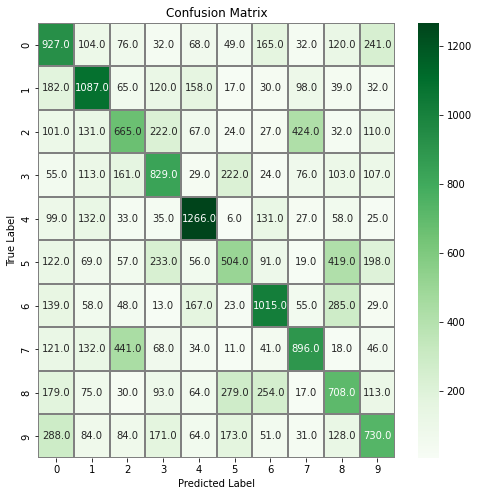

Classification Report
              precision    recall  f1-score   support

     Class 0       0.42      0.51      0.46      1814
     Class 1       0.55      0.59      0.57      1828
     Class 2       0.40      0.37      0.38      1803
     Class 3       0.46      0.48      0.47      1719
     Class 4       0.64      0.70      0.67      1812
     Class 5       0.39      0.29      0.33      1768
     Class 6       0.55      0.55      0.55      1832
     Class 7       0.53      0.50      0.51      1808
     Class 8       0.37      0.39      0.38      1812
     Class 9       0.45      0.40      0.43      1804

    accuracy                           0.48     18000
   macro avg       0.48      0.48      0.48     18000
weighted avg       0.48      0.48      0.48     18000

Accuracy: 0.4792777777777778
Precision: 0.4758711423950316
Recall: 0.4785493851115376
F1 Score: 0.4754755226965619
563/563 [==============================] - 2s 4ms/step
AUC-ROC: 0.8660315477283348


In [61]:
# Predict classes
y_pred_classes = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_classes, axis=-1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print the Classification Report
print('Classification Report')
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute AUC-ROC
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_pred_probs = model.predict(x_test)
auc_roc = roc_auc_score(y_test_one_hot, y_pred_probs)
print("AUC-ROC:", auc_roc)


CNN Classifier Train and test

In [44]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1313/1313 [==============================] - 56s 42ms/step - loss: 1.1289 - accuracy: 0.6271 - val_loss: 0.5187 - val_accuracy: 0.8544
Epoch 2/10
1313/1313 [==============================] - 55s 42ms/step - loss: 0.5525 - accuracy: 0.8376 - val_loss: 0.3742 - val_accuracy: 0.8923
Epoch 3/10
1313/1313 [==============================] - 55s 42ms/step - loss: 0.4523 - accuracy: 0.8661 - val_loss: 0.3353 - val_accuracy: 0.9005
Epoch 4/10
1313/1313 [==============================] - 55s 42ms/step - loss: 0.4038 - accuracy: 0.8818 - val_loss: 0.2999 - val_accuracy: 0.9120
Epoch 5/10
1313/1313 [==============================] - 55s 42ms/step - loss: 0.3651 - accuracy: 0.8919 - val_loss: 0.2749 - val_accuracy: 0.9194
Epoch 6/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.3329 - accuracy: 0.9018 - val_loss: 0.2593 - val_accuracy: 0.9245
Epoch 7/10
1313/1313 [==============================] - 57s 43ms/step - loss: 0.3094 - accuracy: 0.9066 - val_loss: 0.2763 -

CNN Evaluation metrics

563/563 [==============================] - 5s 9ms/step


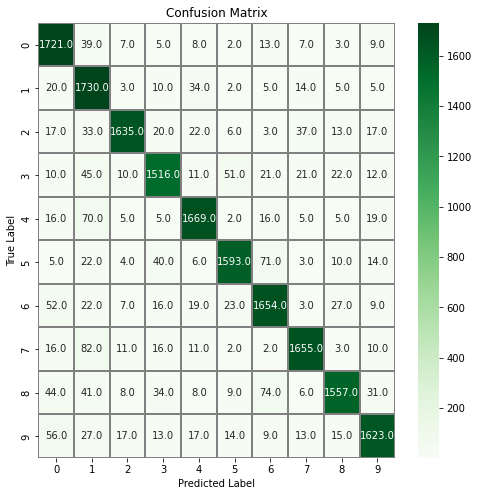

Classification Report
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91      1814
     Class 1       0.82      0.95      0.88      1828
     Class 2       0.96      0.91      0.93      1803
     Class 3       0.91      0.88      0.89      1719
     Class 4       0.92      0.92      0.92      1812
     Class 5       0.93      0.90      0.92      1768
     Class 6       0.89      0.90      0.89      1832
     Class 7       0.94      0.92      0.93      1808
     Class 8       0.94      0.86      0.90      1812
     Class 9       0.93      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

Accuracy: 0.9085
Precision: 0.9110890562014082
Recall: 0.9083104870339127
F1 Score: 0.9087796207901817
563/563 [==============================] - 6s 10ms/step
AUC-ROC: 0.9937832538308546


In [50]:
# Predict classes
y_pred_classes = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_classes, axis=-1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print the Classification Report
print('Classification Report')
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute AUC-ROC
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_pred_probs = model.predict(x_test)
auc_roc = roc_auc_score(y_test_one_hot, y_pred_probs)
print("AUC-ROC:", auc_roc)


Plotting resuts

In [ ]:

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Fine-tuned CNN train and test

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
# Freeze the earlier layers
for layer in model.layers[:6]:
    layer.trainable = False

# Modify the output layer for the new number of classes
model.add(Dense(num_classes, activation='softmax'))

# Adjust the learning rate
optimizer = Adam(lr=0.0001)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Apply learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Apply data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

# Train the fine-tuned model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=10,
          validation_data=(x_val, y_val),
          callbacks=[reduce_lr])

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1313/1313 [==============================] - 42s 32ms/step - loss: 2.2987 - accuracy: 0.1115 - val_loss: 2.2849 - val_accuracy: 0.1910 - lr: 1.0000e-04
Epoch 2/10
1313/1313 [==============================] - 35s 27ms/step - loss: 2.2835 - accuracy: 0.1640 - val_loss: 2.2611 - val_accuracy: 0.2846 - lr: 1.0000e-04
Epoch 3/10
1313/1313 [==============================] - 43s 33ms/step - loss: 2.2650 - accuracy: 0.2995 - val_loss: 2.2296 - val_accuracy: 0.5552 - lr: 1.0000e-04
Epoch 4/10
1313/1313 [==============================] - 34s 26ms/step - loss: 2.2383 - accuracy: 0.3541 - val_loss: 2.1865 - val_accuracy: 0.5569 - lr: 1.0000e-04
Epoch 5/10
1313/1313 [==============================] - 36s 27ms/step - loss: 2.2014 - accuracy: 0.3577 - val_loss: 2.1323 - val_accuracy: 0.5555 - lr: 1.0000e-04
Epoch 6/10
1313/1313 [==============================] - 36s 28ms/step - loss: 2.1560 - accuracy: 0.3594 - val_loss: 2.0686 - val_accuracy: 0.5561 - lr: 1.0000e-04
Epoch 7/10
1313/1313 [

563/563 [==============================] - 5s 10ms/step


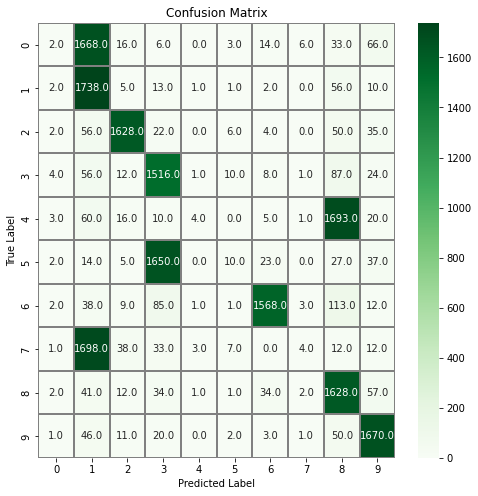

Classification Report
              precision    recall  f1-score   support

     Class 0       0.10      0.00      0.00      1814
     Class 1       0.32      0.95      0.48      1828
     Class 2       0.93      0.90      0.92      1803
     Class 3       0.45      0.88      0.59      1719
     Class 4       0.36      0.00      0.00      1812
     Class 5       0.24      0.01      0.01      1768
     Class 6       0.94      0.86      0.90      1832
     Class 7       0.22      0.00      0.00      1808
     Class 8       0.43      0.90      0.59      1812
     Class 9       0.86      0.93      0.89      1804

    accuracy                           0.54     18000
   macro avg       0.49      0.54      0.44     18000
weighted avg       0.49      0.54      0.44     18000

Accuracy: 0.5426666666666666
Precision: 0.4860267146814981
Recall: 0.5426862598446595
F1 Score: 0.43860702130743656
563/563 [==============================] - 6s 10ms/step
AUC-ROC: 0.9152744926357445


In [58]:
# Predict classes
y_pred_classes = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_classes, axis=-1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print the Classification Report
print('Classification Report')
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute AUC-ROC
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_pred_probs = model.predict(x_test)
auc_roc = roc_auc_score(y_test_one_hot, y_pred_probs)
print("AUC-ROC:", auc_roc)


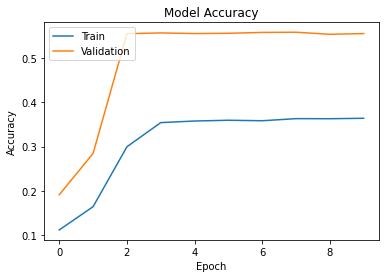

In [59]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
